## Assignment 04
## Brendan Dasilva
## 101447806

#### 0. Imports

#### -----------------------------------------------------------------------------------------------------------------------------

In [5]:
import pandas as pd

#### 1.    Download the test.csv file and store it in a DataFrame named, myDF.

In [7]:
myDF = pd.read_csv('test.csv')

#### 2.	Show the first three rows of the DF.

In [9]:
# use head() to show rows - defaults to 5 - we specify 3 here as a param
myDF.head(3)

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,F,NXEYEM,EX85,[56$],Asia
1,20,299,21,M,VNFKZD,CT41,[18$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America


#### 3.	Delete the ‘Model’ column from the DF temporarily.

In [11]:
# use drop to remove a column temporarily by passing in the column name
myDF.drop(columns=['Model'])
myDF.head() # its still there

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,F,NXEYEM,EX85,[56$],Asia
1,20,299,21,M,VNFKZD,CT41,[18$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America
3,40,156,44,Q,RHRHJY,IR14,[89$],Asia
4,50,468,33,J,HPQCMC,QX90,[95$],Africa


#### 4.	Delete the ‘Model’ column permanently, using the assignment (Not inplace parameter). 
####    Is there any output when you run the permanent deletion? So, how can you make sure it is deleted?

In [13]:
# use the assigned variable myDF to permanetly drop the 'Model' column
myDF = myDF.drop(columns=['Model'])
myDF.head() # now we can confirm it is removed

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,[56$],Asia
1,20,299,21,M,VNFKZD,[18$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
3,40,156,44,Q,RHRHJY,[89$],Asia
4,50,468,33,J,HPQCMC,[95$],Africa


#### 5.	Now, let’s delete rows 1, 3, and 5 permanently, using inplace. Then show the first 4 Rows of myDF.

In [15]:
# instead of using assignment we can use inplace param set to True to directly modify the dataframe (you would typically want to use assignment though)
myDF.drop([1, 3, 5], inplace=True)
myDF.head(4)

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,[56$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
4,50,468,33,J,HPQCMC,[95$],Africa
6,70,327,24,F,NLVQPY,[25$],Europe


#### 6.	Calculate the mean of ‘Range’ column.

In [17]:
# use the mean() function from pandas to get the mean of the 'Range' column
myDF['Range'].mean()

297.53326293558604

#### 7.	How many ‘F’ do we have in the ‘Type’ column? Replace them permanently with ‘AAA’ and show the first 5 rows.

In [19]:
# use value_counts() returns a series with the counts of unique values in the column
# .get() gets the count of value 'F' in column 'Type' 
# param 0 -- if F does not exist it returns 0 instead of a KeyError
count_f = myDF['Type'].value_counts().get('F', 0)
print(f"The number of times 'F' appears in the 'Type' column is: {count_f}")

The number of times 'F' appears in the 'Type' column is: 50


In [20]:
# permanent replace 'F' with 'AAA'
myDF['Type'] = myDF['Type'].replace('F', 'AAA')
myDF.head()

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,AAA,NXEYEM,[56$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
4,50,468,33,J,HPQCMC,[95$],Africa
6,70,327,24,AAA,NLVQPY,[25$],Europe
7,80,495,50,Z,DLUMAX,[70$],Antarctica


#### 8.	Get rid of the [, $ and ] from the ‘Cost’ column permanently and display the first 5 rows. 
####    What is the type of ‘Cost’ column after this?

In [22]:
# str.replace for string manipulation on the 'Cost' column --> regex=True to match literal [ ] $
# r before the first param treats the string as a raw string to avoid any invalid escape sequence warnings
myDF['Cost'] = myDF['Cost'].str.replace(r'[\[\]$]', '', regex=True)
myDF.head()

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,AAA,NXEYEM,56,Asia
2,30,378,28,X,IMGMFY,90,North America
4,50,468,33,J,HPQCMC,95,Africa
6,70,327,24,AAA,NLVQPY,25,Europe
7,80,495,50,Z,DLUMAX,70,Antarctica


#### 9.	Change the ‘Cost’ column data type to integer and display the result.

In [24]:
# astype() method to change the data type of the 'Cost' column to interger 
# need to do this before we can perform calculations on this column
myDF['Cost'] = myDF['Cost'].astype(int)
print(myDF['Cost'].dtypes)

int64


#### 10.	Calculate the average of ‘Cost’ column. Then, calculate the average of ‘Cost’ for each ‘Continent’.

In [26]:
# .mean() to calculate the average
cost_mean = myDF['Cost'].mean()
print(f"The mean of the Cost column is : {cost_mean}")

The mean of the Cost column is : 54.586061246040124


In [27]:
# for each Continent use groupby, pass in 'Continent' and perform the mean calculation again on the grouped 'Cost' column
continent_cost_mean = myDF.groupby('Continent')['Cost'].mean()
print(f"The mean of the Cost column is : {continent_cost_mean}")

The mean of the Cost column is : Continent
Africa           54.741259
Antarctica       54.706897
Asia             54.279070
Australia        56.838028
Europe           53.258993
North America    55.006993
South America    53.162963
Name: Cost, dtype: float64


#### 11.	Calculate the min, max and standard deviation of the ‘Cost’ column, group by each ‘Continent’, all in one command.

In [29]:
# using groupby again for Continent
# agg() method allows us to apply multiple functions on the selected column
continent_cost_agg = myDF.groupby('Continent')['Cost'].agg(['min', 'max', 'std'])
print(continent_cost_agg)

               min  max        std
Continent                         
Africa          11   97  25.961432
Antarctica      10   97  24.880590
Asia            10   99  26.109737
Australia       10   97  26.057121
Europe          10   99  26.185054
North America   10   99  25.664821
South America   10   98  25.724780


#### 12.	Calculate the min, max and standard deviation of all numerical columns, group by each ‘Continent’, all in one command.

In [31]:
# describe() method generates stats on all numeric columns, groupedby 'Continent'
myDF.groupby('Continent').describe()

ID                                                           \
               count         mean          std    min     25%     50%     75%   
Continent                                                                       
Africa         143.0  4797.692308  2614.387519   50.0  2680.0  4900.0  7115.0   
Antarctica     116.0  4569.310345  2936.313786   80.0  1887.5  4455.0  7330.0   
Asia           129.0  4334.031008  2683.431665   10.0  2040.0  4040.0  6680.0   
Australia      142.0  4677.323944  2793.945560  120.0  2242.5  4590.0  6992.5   
Europe         139.0  5078.848921  2623.991892   70.0  3065.0  4970.0  7295.0   
North America  143.0  4906.783217  2841.216413   30.0  2375.0  4820.0  7580.0   
South America  135.0  4963.851852  2656.186804   90.0  2910.0  5070.0  6975.0   

                       Range              ... Value         Cost             \
                  max  count        mean  ...   75%   max  count       mean   
Continent                                 ...                                 
Africa         9450.0  143.0  282.475524  ...  42.0  50.0  143.0  54.741259   
Antarctica     9370.0  116.0  288.698276  ...  39.0  50.0  116.0  54.706897   
Asia           9390.0  129.0  284.914729  ...  36.0  50.0  129.0  54.279070   
Australia      9410.0  142.0  305.894366  ...  42.0  50.0  142.0  56.838028   
Europe         9480.0  139.0  320.338129  ...  42.0  50.0  139.0  53.258993   
North America  9490.0  143.0  299.832168  ...  42.0  50.0  143.0  55.006993   
South America  9500.0  135.0  298.422222  ...  41.0  50.0  135.0  53.162963   

                                                         
                     std   min    25%   50%   75%   max  
Continent                                                
Africa         25.961432  11.0  34.00  54.0  78.0  97.0  
Antarctica     24.880590  10.0  35.00  59.0  74.0  97.0  
Asia           26.109737  10.0  33.00  54.0  74.0  99.0  
Australia      26.057121  10.0  36.25  56.5  81.0  97.0  
Europe         26.185054  10.0  29.00  54.0  73.0  99.0  
North America  25.664821  10.0  33.50  56.0  78.5  99.0  
South America  25.724780  10.0  31.00  55.0  74.5  98.0  

[7 rows x 32 columns]

#### 13.	Illustrate the mean of all numerical columns, group by the ‘Continent’, using a ‘bar’ chart.

<Axes: xlabel='Continent'>

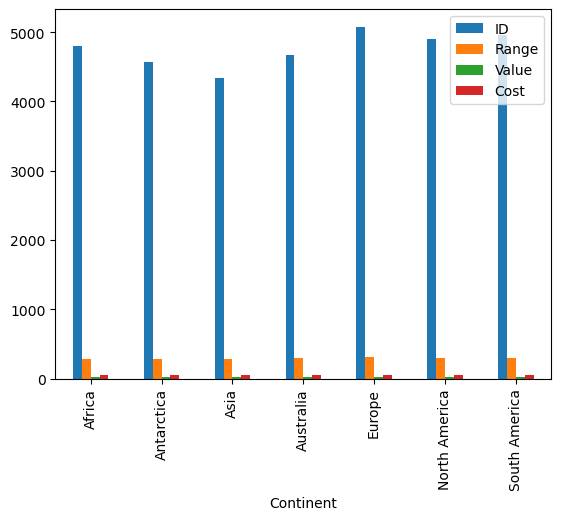

In [33]:
# now we are adding on .plot() from the pandas library to create a bar chart - kind just specifies what the type of chart we want

# myDF.groupby('Continent').mean().plot(kind='bar') # this gives a type error - even though column 'Cost' is of type int64
myDF.groupby('Continent').mean(numeric_only=True).plot(kind='bar') # adding param numeric_only=True to the mean method resolves this type issue

# numeric_cols = myDF.select_dtypes(include='number')  # Select only numeric columns
# numeric_cols['Continent'] = myDF['Continent']       # Add 'Continent' for grouping
# numeric_cols.groupby('Continent').mean().plot(kind='bar')

#### 14.	Count the number of each continent in the ‘Continent’ column. 

In [35]:
# just a quick value_counts on the 'Continent' column
myDF['Continent'].value_counts()

Continent
North America    143
Africa           143
Australia        142
Europe           139
South America    135
Asia             129
Antarctica       116
Name: count, dtype: int64

#### 15.	Show the percentage of each continent in the ‘Continent’ column. 

In [37]:
# normalize=True --> instead of raw counts of each, this option will return proportion of each unique value ie. percentage of total
myDF['Continent'].value_counts(normalize=True) * 100

Continent
North America    15.100317
Africa           15.100317
Australia        14.994720
Europe           14.677930
South America    14.255544
Asia             13.621964
Antarctica       12.249208
Name: proportion, dtype: float64

#### 16.	Show the unique values that we have in the ‘Continent’ column. Then show the number of unique values that we have 
####        in the ‘Continent’ column.

In [39]:
# unique() prints each of the unique values in the 'Continent' column
continent_unique = myDF['Continent'].unique()
print(continent_unique)

# nunique() does a count on the number of unique values in the 'Continent' column
continent_num_unique = myDF['Continent'].nunique()
print(continent_num_unique)

['Asia' 'North America' 'Africa' 'Europe' 'Antarctica' 'South America'
 'Australia']
7


#### 17.	Use the value_count method for the ‘Cost’ column and describe the output as a comment in the next cell, 
####        using the # for the comment.

In [41]:
# value_counts() on the 'Cost' column
cost_counts = myDF['Cost'].value_counts()
print(cost_counts)

Cost
56    20
35    20
73    18
54    17
97    17
      ..
18     5
94     5
22     5
42     3
24     2
Name: count, Length: 90, dtype: int64


In [42]:
# result above shows the frequency of each unique value in the 'Cost' column.

#### 18.	Plot a histogram for the ‘Cost’ column. 

<Axes: >

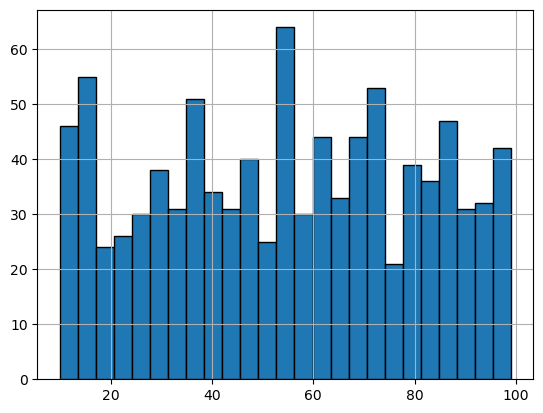

In [44]:
# hist() from the pandas library to blot the 'Cost' column
myDF['Cost'].hist(bins=25, edgecolor='black')

#### 19.	Bonus question: Try to change the number of bins to 50 to show the result more accurately.

<Axes: >

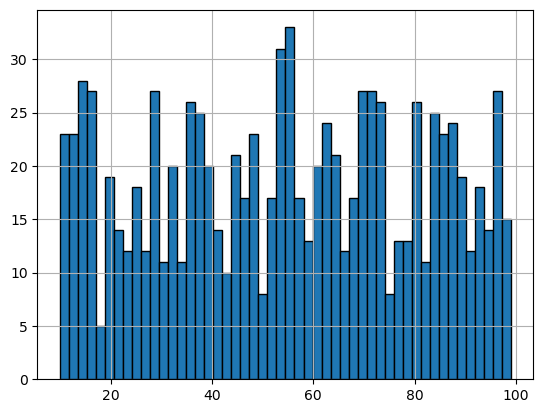

In [46]:
# changing bins to 50 to show more detail
# fewer bins --> larger intervals; less detailed but easier to interpret.
# More bins --> smaller intervals; more detailed but can be harder to interpret
myDF['Cost'].hist(bins=50, edgecolor='black')

#### 20.	How many missing values do we have in the ‘Zip Code’ column? How many missing values in the ‘Type’ column?
####        Provide a brief summary of null values for the entire Data Frame.

In [48]:
# missing values in 'Zip Code' --> isnull() checks for rows with missing values --> sum() adds the number of occurances up
myDF['Zip Code'].isnull().sum()

9

In [49]:
# missing values in 'Type' --> isnull() checks for rows with missing values --> sum() adds the number of occurances up
myDF['Type'].isnull().sum()

2

In [50]:
# quick summary of the count of null values in each column
myDF.isnull().sum()

ID           0
Range        0
Value        0
Type         2
Zip Code     9
Cost         0
Continent    0
dtype: int64

#### 21.	If we drop all the rows that have ‘any’ missing value, how many rows will remain in myDF?

In [52]:
# dropna() removes rows with missing values ie. NaN
# inplace=True modifies myDF without creating a copy
# print("Rows before dropping missing values:", len(myDF)) # 947

# myDF.dropna(inplace=True)
# print("Rows after dropping missing values:", len(myDF)) # 936

# last cell we counted 9 + 2 rows with NaN values so as you can see we dropped those 11 rows and this confirms that
# repurpose the above code for 24.

#### 22.   Show the statistics for the ‘Type’ column using the value_count method, including the NaN values in the list. 
####       How many missing values do we have?

In [54]:
# in this case we set dropna=False so we can include them in the count
type_counts = myDF['Type'].value_counts(dropna=False)
print(type_counts)

Type
AAA    50
N      47
Z      44
Q      44
C      43
K      41
V      41
A      40
H      39
Y      39
G      38
M      37
X      37
U      36
O      36
L      35
J      35
S      34
I      33
W      32
D      30
B      29
T      28
P      28
R      25
E      24
NaN     2
Name: count, dtype: int64


In [55]:
# count the count of missing values
missing_values = myDF['Type'].isnull().sum()
print(f"Number of missing values in 'Type': {missing_values}")

Number of missing values in 'Type': 2


#### 23.	Replace the ‘Type’ column missing values with ‘XXX’ and show the result again.

In [57]:
# 
myDF.fillna({'Type': 'XXX'}, inplace=True)
# Show the updated 'Type' column
print(myDF['Type'].value_counts())

Type
AAA    50
N      47
Z      44
Q      44
C      43
K      41
V      41
A      40
H      39
Y      39
G      38
M      37
X      37
U      36
O      36
L      35
J      35
S      34
I      33
W      32
D      30
B      29
T      28
P      28
R      25
E      24
XXX     2
Name: count, dtype: int64


#### 24.	Drop the rows that have any missing value permanently and show the number of rows after running the drop command.

In [59]:
# show the number of rows before dropping missing values
print("Rows before dropping missing values:", len(myDF))

# drop rows with any missing values permanently
myDF.dropna(inplace=True)

# show the number of rows after dropping missing values
print("Rows after dropping missing values:", len(myDF))

Rows before dropping missing values: 947
Rows after dropping missing values: 938


#### 25.	Set the ‘ID’ column as the new index and delete the index name. Then show the first 5 rows of the DF. 
####        Show the value of the cell that its ID is 70 and its column header is ‘Value’.

In [61]:
# before
myDF.head()

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,AAA,NXEYEM,56,Asia
2,30,378,28,X,IMGMFY,90,North America
4,50,468,33,J,HPQCMC,95,Africa
6,70,327,24,AAA,NLVQPY,25,Europe
7,80,495,50,Z,DLUMAX,70,Antarctica


In [62]:
# set the new index
myDF.set_index('ID', inplace=True)

# delete the index name
myDF.index.name = None

# show the first 5 rows
myDF.head()

,Range,Value,Type,Zip Code,Cost,Continent
10,192,50,AAA,NXEYEM,56,Asia
30,378,28,X,IMGMFY,90,North America
50,468,33,J,HPQCMC,95,Africa
70,327,24,AAA,NLVQPY,25,Europe
80,495,50,Z,DLUMAX,70,Antarctica


In [63]:
# look up the entry with ID of 70 and return the value of the 'Value' column
myDF.loc[70, 'Value']

24

#### 26.	Show the index, columns and the shape of the current DF. Bring back the ID column to the DF and reset the index. 
####        Again, show the index, columns and the shape of the current DF.

In [65]:
# 1. show the index, columns, and shape of the current dataframe
print("Index before resetting:", myDF.index)
print("Columns before resetting:", myDF.columns)
print("Shape before resetting:", myDF.shape)

Index before resetting: Index([  10,   30,   50,   70,   80,   90,  100,  110,  120,  130,
       ...
       9410, 9420, 9430, 9440, 9450, 9460, 9470, 9480, 9490, 9500],
      dtype='int64', length=938)
Columns before resetting: Index(['Range', 'Value', 'Type', 'Zip Code', 'Cost', 'Continent'], dtype='object')
Shape before resetting: (938, 6)


In [66]:
# 2. Reset the index and bring the 'ID' column back to the dataframe
myDF.reset_index(inplace=True)

In [67]:
# 3. Show the index, columns, and shape of the DataFrame after resetting
print("Index after resetting:", myDF.index)
print("Columns after resetting:", myDF.columns)
print("Shape after resetting:", myDF.shape)

Index after resetting: RangeIndex(start=0, stop=938, step=1)
Columns after resetting: Index(['index', 'Range', 'Value', 'Type', 'Zip Code', 'Cost', 'Continent'], dtype='object')
Shape after resetting: (938, 7)


#### 27.	Use the describe method to see the statistics of myDF and fetch the value of the first row and the third column of the result.

In [69]:
# describe() to get a summary of the stats in the dataframe
# iloc is a pandas method used for position-based indexing
# --> 0 indicating the first row
# --> 2 incicating the third column
stats = myDF.describe()
stats.iloc[0, 2]

938.0

#### 28.	Sort the value_counts() of the ‘Continent’ column of the DF. Then, sort the value_counts() of the ‘Continent’ column,
####        based on the alphabetic order of the continents.

In [71]:
# frequency based sort of the continent column 
myDF['Continent'].value_counts()

Continent
North America    141
Australia        141
Africa           139
Europe           138
South America    135
Asia             129
Antarctica       115
Name: count, dtype: int64

In [72]:
# alpha sort of the continent column 
myDF['Continent'].value_counts().sort_index()

Continent
Africa           139
Antarctica       115
Asia             129
Australia        141
Europe           138
North America    141
South America    135
Name: count, dtype: int64

#### 29.	Show all the columns of the following rows in one command. [1,3,5,7] and show the first 7 rows of the following 
####        columns: ‘Type’ and ‘Continent’

In [74]:
# loc[] to select rows based off index values
myDF.loc[[1, 3, 5, 7]]

,index,Range,Value,Type,Zip Code,Cost,Continent
1,30,378,28,X,IMGMFY,90,North America
3,70,327,24,AAA,NLVQPY,25,Europe
5,90,115,30,S,KYJUHA,17,South America
7,110,301,29,A,OVINZU,69,South America


In [75]:
# selects only 'Type' and 'Continent' columns --> head(7) shows first 7 rows
myDF[['Type', 'Continent']].head(7)

,Type,Continent
0,AAA,Asia
1,X,North America
2,J,Africa
3,AAA,Europe
4,Z,Antarctica
5,S,South America
6,K,South America


#### 30.	Show the ‘Value’ of the ‘Type’ that are equal to ’XXX’.

In [122]:
# create a boolean where each element is True if the corresponding value in the 'Type' column is 'XXX', and False if not.
# filter rows of the myDF using the boolean --> only rows where the boolean is True are kept
# selects and returns the 'Value' column where 'Type' equals 'XXX'
myDF[myDF['Type'] == 'XXX']['Value']

687    42
743    37
Name: Value, dtype: int64